Welcome DataHacker!
 
Congratulations on your new job! This time you are helping out Unicorn Investors with your data hacking skills. They are considering making an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.
 
You need to help Unicorn ventures with the decision. They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

Evaluation Metric:
Root Mean Squre Error (RMSE) is the evaluation metric for this contest

Import libraries

In [1251]:
#import libraries
import numpy as np
import pandas as pd

Load and read datasets

In [1252]:
# load datasets
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Jet-Rail-TS/main/Train_SU63ISt%20-%20Train_SU63ISt.csv')
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Jet-Rail-TS/main/Test_0qrQsBZ%20-%20Test_0qrQsBZ.csv')
sample = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Jet-Rail-TS/main/sample_submission_LSeus50%20-%20sample_submission_LSeus50.csv')

In [1253]:
train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [1254]:
test

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00
...,...,...
5107,23395,26-04-2015 19:00
5108,23396,26-04-2015 20:00
5109,23397,26-04-2015 21:00
5110,23398,26-04-2015 22:00


In [1255]:
sample

,ID,Count
0,18288,0
1,18289,0
2,18290,0
3,18291,0
4,18292,0
...,...,...
5107,23395,0
5108,23396,0
5109,23397,0
5110,23398,0


In [1256]:
train.shape

(18288, 3)

In [1257]:
test.shape

(5112, 2)

In [1258]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [1259]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        5112 non-null   int64 
 1   Datetime  5112 non-null   object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


Check null values

In [1260]:
train.isnull().sum()

ID          0
Datetime    0
Count       0
dtype: int64

In [1261]:
test.isnull().sum()

ID          0
Datetime    0
dtype: int64

Extract date and time

In [1262]:
#extract date and time 
import datetime 
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M',infer_datetime_format=True) 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M', infer_datetime_format=True) 

In [1263]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


In [1264]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        5112 non-null   int64         
 1   Datetime  5112 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 80.0 KB


Ordinal encode date and time

In [1265]:
train['date_ordinal'] = train['Datetime'].apply(lambda x: x.toordinal())
train

,ID,Datetime,Count,date_ordinal
0,0,2012-08-25 00:00:00,8,734740
1,1,2012-08-25 01:00:00,2,734740
2,2,2012-08-25 02:00:00,6,734740
3,3,2012-08-25 03:00:00,2,734740
4,4,2012-08-25 04:00:00,2,734740
...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,735501
18284,18284,2014-09-25 20:00:00,732,735501
18285,18285,2014-09-25 21:00:00,702,735501
18286,18286,2014-09-25 22:00:00,580,735501


In [1266]:
test['date_ordinal'] = test['Datetime'].apply(lambda x: x.toordinal())
test

,ID,Datetime,date_ordinal
0,18288,2014-09-26 00:00:00,735502
1,18289,2014-09-26 01:00:00,735502
2,18290,2014-09-26 02:00:00,735502
3,18291,2014-09-26 03:00:00,735502
4,18292,2014-09-26 04:00:00,735502
...,...,...,...
5107,23395,2015-04-26 19:00:00,735714
5108,23396,2015-04-26 20:00:00,735714
5109,23397,2015-04-26 21:00:00,735714
5110,23398,2015-04-26 22:00:00,735714


Extract hour from datetime

In [1267]:
from datetime import datetime as dt
train['hour'] = train['Datetime'].dt.hour
train.hour = train.hour / 24
train['date_hour'] = train.date_ordinal + train.hour
train

,ID,Datetime,Count,date_ordinal,hour,date_hour
0,0,2012-08-25 00:00:00,8,734740,0.000000,734740.000000
1,1,2012-08-25 01:00:00,2,734740,0.041667,734740.041667
2,2,2012-08-25 02:00:00,6,734740,0.083333,734740.083333
3,3,2012-08-25 03:00:00,2,734740,0.125000,734740.125000
4,4,2012-08-25 04:00:00,2,734740,0.166667,734740.166667
...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,735501,0.791667,735501.791667
18284,18284,2014-09-25 20:00:00,732,735501,0.833333,735501.833333
18285,18285,2014-09-25 21:00:00,702,735501,0.875000,735501.875000
18286,18286,2014-09-25 22:00:00,580,735501,0.916667,735501.916667


In [1268]:
from datetime import datetime as dt
test['hour'] = test['Datetime'].dt.hour
test.hour = test.hour / 24
test['date_hour'] = test.date_ordinal + train.hour
test

,ID,Datetime,date_ordinal,hour,date_hour
0,18288,2014-09-26 00:00:00,735502,0.000000,735502.000000
1,18289,2014-09-26 01:00:00,735502,0.041667,735502.041667
2,18290,2014-09-26 02:00:00,735502,0.083333,735502.083333
3,18291,2014-09-26 03:00:00,735502,0.125000,735502.125000
4,18292,2014-09-26 04:00:00,735502,0.166667,735502.166667
...,...,...,...,...,...
5107,23395,2015-04-26 19:00:00,735714,0.791667,735714.791667
5108,23396,2015-04-26 20:00:00,735714,0.833333,735714.833333
5109,23397,2015-04-26 21:00:00,735714,0.875000,735714.875000
5110,23398,2015-04-26 22:00:00,735714,0.916667,735714.916667


Graphics

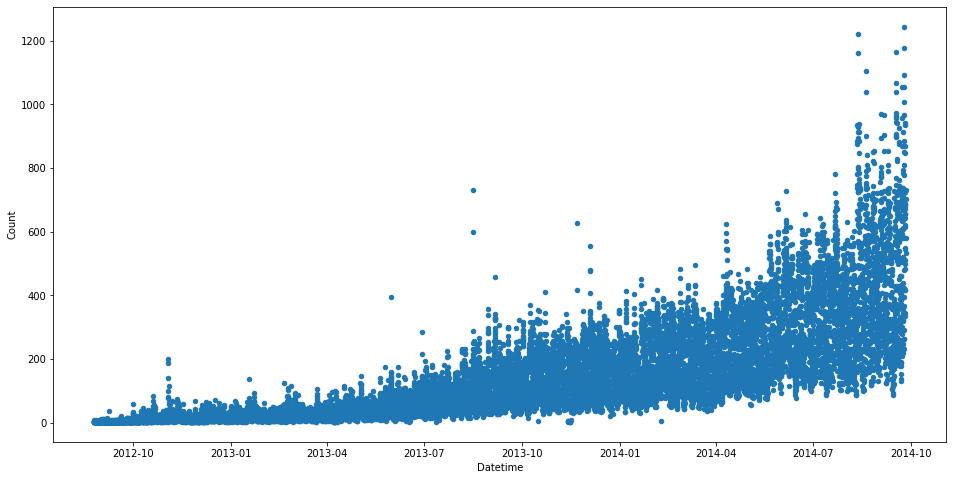

In [1269]:
# visualize the relationship between the features and the response using scatterplots
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, sharey=True)
train.plot(kind='scatter', x='Datetime', y='Count', ax=axs, figsize=(16, 8))

Text(0, 0.5, 'Passenger count')

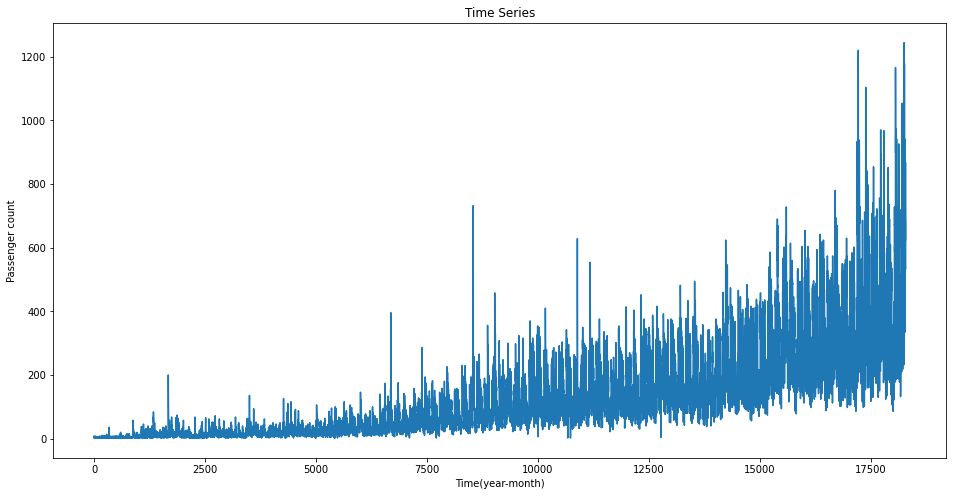

In [1270]:
# different way of plotting passenger count for training dataset. 
train.Count.plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 

Define X and y

In [1271]:
y = train.Count
X = train.date_hour
X_test = test.date_hour

Reshape

In [1272]:
X = X.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

Normalize data

In [1273]:
#X = (X - X.mean()) / (X.max() - X.min())
#X

In [1274]:
#X_test = (X_test - X_test.mean()) / (X_test.max() - X_test.min())
#X_test

Split X for training and validation

In [1275]:
# split into train and test sets
train_size = int(len(X) * 0.90)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((16459, 1), (16459,), (1829, 1), (1829,), (5112, 1))

Define model

In [1276]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(random_state=1, max_iter=1000, verbose=True).fit(X_train, y_train)
y_pred = model.predict(X_val)
y_pred

Binning 0.000 GB of training data: 0.003 s
Fitting gradient boosted rounds:
[1/1000] 1 tree, 31 leaves, max depth = 9, in 0.005s
[2/1000] 1 tree, 31 leaves, max depth = 8, in 0.007s
[3/1000] 1 tree, 31 leaves, max depth = 8, in 0.013s
[4/1000] 1 tree, 31 leaves, max depth = 10, in 0.014s
[5/1000] 1 tree, 31 leaves, max depth = 9, in 0.013s
[6/1000] 1 tree, 31 leaves, max depth = 10, in 0.012s
[7/1000] 1 tree, 31 leaves, max depth = 9, in 0.013s
[8/1000] 1 tree, 31 leaves, max depth = 11, in 0.025s
[9/1000] 1 tree, 31 leaves, max depth = 10, in 0.008s
[10/1000] 1 tree, 31 leaves, max depth = 10, in 0.007s
[11/1000] 1 tree, 31 leaves, max depth = 9, in 0.008s
[12/1000] 1 tree, 31 leaves, max depth = 11, in 0.007s
[13/1000] 1 tree, 31 leaves, max depth = 12, in 0.007s
[14/1000] 1 tree, 31 leaves, max depth = 11, in 0.009s
[15/1000] 1 tree, 31 leaves, max depth = 9, in 0.008s
[16/1000] 1 tree, 31 leaves, max depth = 15, in 0.017s
[17/1000] 1 tree, 31 leaves, max depth = 12, in 0.011s
[18/1

array([403.53845657, 403.53845657, 403.53845657, ..., 403.53845657,
       403.53845657, 403.53845657])

In [1277]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(y_val, y_pred)) 
print(rms)

194.5948003835283


In [1278]:
df_val = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
df_val

,Actual,Predicted
16459,420,403.538457
16460,386,403.538457
16461,348,403.538457
16462,378,403.538457
16463,380,403.538457
...,...,...
18283,868,403.538457
18284,732,403.538457
18285,702,403.538457
18286,580,403.538457


Graphics

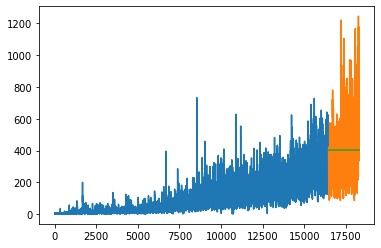

In [1279]:
# plot predictions and expected results
plt.plot(y_train)
plt.plot([None for i in y_train] + [x for x in y_val])
plt.plot([None for i in y_train] + [x for x in y_pred])
plt.show()

Predict on test dataset

In [1280]:
prediction = model.predict(X_test)
prediction

array([403.53845657, 403.53845657, 403.53845657, ..., 403.53845657,
       403.53845657, 403.53845657])

Prepare submission

In [1281]:
final_result = pd.DataFrame({'ID': test.ID, 'Count': prediction})
final_result

,ID,Count
0,18288,403.538457
1,18289,403.538457
2,18290,403.538457
3,18291,403.538457
4,18292,403.538457
...,...,...
5107,23395,403.538457
5108,23396,403.538457
5109,23397,403.538457
5110,23398,403.538457


In [1282]:
final_result.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [1283]:
#upload submission
submission = pd.read_csv("submission.csv")
submission

,ID,Count
0,18288,403.538457
1,18289,403.538457
2,18290,403.538457
3,18291,403.538457
4,18292,403.538457
...,...,...
5107,23395,403.538457
5108,23396,403.538457
5109,23397,403.538457
5110,23398,403.538457
